In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics

from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [8]:
data = pd.read_csv('./Data/cleandata.csv')
x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [9]:

RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [19]:
GBscore = GB.score(x_test, y_test)
RFscore = RF.score(x_test, y_test)
total_val_acc = RFscore + GBscore 
w1 = RFscore / total_val_acc
w2 = GBscore / total_val_acc

In [20]:
ensemble = VotingClassifier(estimators=[('RF', RF), ('GB', GB)], voting='soft',weights=[w1,w2])
ensemble.fit(x_train, y_train)


VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('GB', GradientBoostingClassifier())],
                 voting='soft',
                 weights=[0.501841620626151, 0.49815837937384894])

In [21]:
y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)


Training Accuracy score: 0.9775862068965517
Testing Accuracy score: 0.9345955249569707
classification_report 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       239
         1.0       0.94      0.95      0.94       342

    accuracy                           0.93       581
   macro avg       0.93      0.93      0.93       581
weighted avg       0.93      0.93      0.93       581



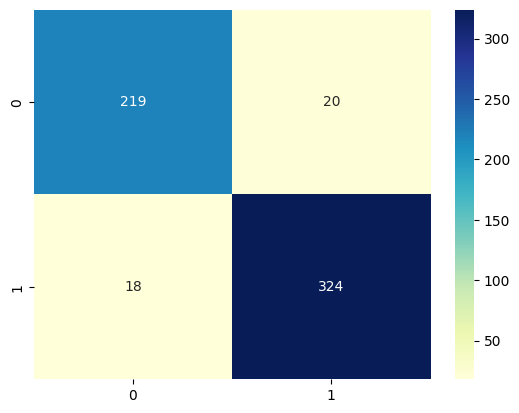

In [22]:
from sklearn.metrics import accuracy_score
import seaborn as sns
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm
                        )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()